In [2]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# plot settings
sns.set(style="white", rc={"axes.facecolor": "#f2f1ec", "figure.facecolor": "#f2f1ec"})  # Change the color code as needed

# custom color palette: 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))
#sns.set_style("darkgrid")

# for multiple plots
# sns.despine(left=True, bottom=True)

In [32]:
df = pd.read_csv('../data/petfinder-adoption-prediction/eda/df_eda.csv')

In [33]:
df["adoptionspeed"] = df["adoptionspeed"].replace(2,1)
df["adoptionspeed"] = df["adoptionspeed"].replace(3,1)
df["adoptionspeed"] = df["adoptionspeed"].replace(4,2)

df["adoptionspeed"].describe()

count    14993.000000
mean         1.279931
std          0.448980
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: adoptionspeed, dtype: float64

In [34]:
pd.crosstab(df.age_bin,df.adoptionspeed,normalize="columns")

adoptionspeed,1,2
age_bin,,
0,0.600593,0.349774
1,0.244257,0.386467
2,0.139218,0.241839
3,0.015932,0.021920


In [35]:
age_df = pd.crosstab(df.age_bin,df.adoptionspeed,normalize="columns")
age_df = age_df.reset_index()
age_df = pd.melt(age_df, id_vars='age_bin', var_name='adoptionspeed', value_name='value')
age_df

,age_bin,adoptionspeed,value
0,0,1,0.600593
1,1,1,0.244257
2,2,1,0.139218
3,3,1,0.015932
4,0,2,0.349774
5,1,2,0.386467
6,2,2,0.241839
7,3,2,0.021920


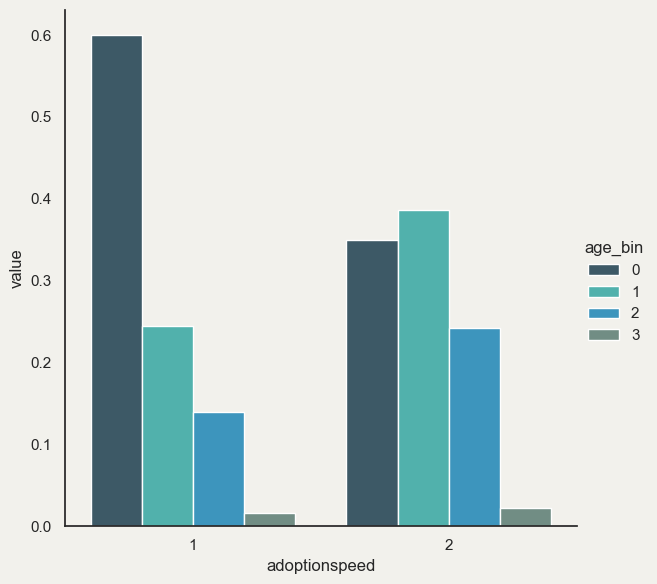

In [36]:
g = sns.catplot(
    data=age_df, kind="bar",
    x="adoptionspeed", y="value", hue="age_bin",
    alpha=1, height=6, legend=True
)

In [38]:
age_df2 = pd.crosstab(df.age_bin,df.adoptionspeed,normalize="index")
age_df2 = age_df2.reset_index()
age_df2 = pd.melt(age_df2, id_vars='age_bin', var_name='adoptionspeed', value_name='value')
age_df2

,age_bin,adoptionspeed,value
0,0,1,0.815392
1,1,1,0.619159
2,2,1,0.596902
3,3,1,0.651515
4,0,2,0.184608
5,1,2,0.380841
6,2,2,0.403098
7,3,2,0.348485


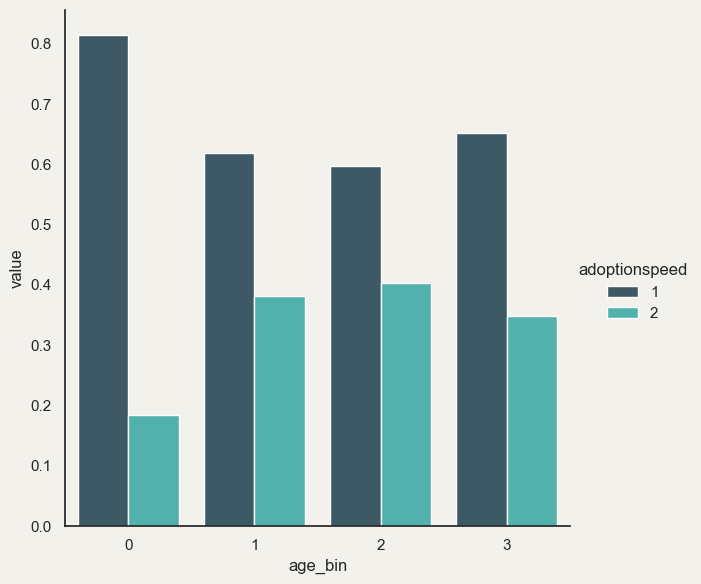

In [39]:
g = sns.catplot(
    data=age_df2, kind="bar",
    x="age_bin", y="value", hue="adoptionspeed",
    alpha=1, height=6, legend=True
)

<Axes: xlabel='age_bin'>

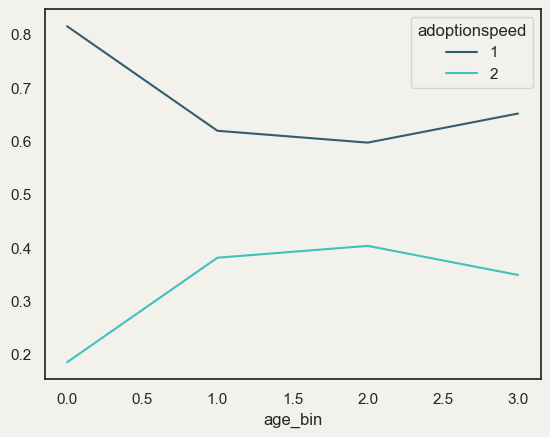

In [40]:
pd.crosstab(df.age_bin,df.adoptionspeed,normalize="index").plot.line()